In [1]:
import os
import shutil
import numpy as np
import gpflow as gpf
import tensorflow as tf
import sklearn.preprocessing as pp

In [2]:
import sys
sys.path.append('../')

import gprmachine as gpm

In [3]:
example = 'OceanT'
target = 0
n_start = 0
n_train = 50
n_test = 30
n_task = 5
n_iter = 80
k_low_list = [8.5, 8.9, 23.5, 20.5, 1.8, 0.8, 0.8, 1.1, 1.1, 25.5,
              0.01, 0.001, 0.001, 0.05, 0.0004, 0.0005, 0.5, 0.5, 0.5, 0.8,
              12.5, 4.8, 3.1, 0.5, 0.5, 1.5, 0.5, 0.5, 0.0006, 0.0005,]
k_up_list = [9.85, 9.9, 25.5, 22.8, 2.8, 1.3, 1.3, 2.3, 2.3, 30.7,
             0.03, 0.003, 0.003, 0.08, 0.0005, 0.0008, 0.1, 0.1, 0.1, 1.0,
             15.85, 5.9, 4.2, 0.7, 0.7, 1.8, 0.9, 0.7, 0.0008, 0.0008]

In [13]:
rdata = np.loadtxt('../data/{}.txt'.format(example))
X = rdata
n_col = np.shape(X)[1]
X1 = np.append(X[1:,], np.zeros((1, n_col)), axis=0)
X2 = np.append(X[2:,], np.zeros((2, n_col)), axis=0)
X3 = np.append(X[3:,], np.zeros((3, n_col)), axis=0)
X4 = np.append(X[4:,], np.zeros((4, n_col)), axis=0)
X5 = np.append(X[5:,], np.zeros((5, n_col)), axis=0)
rdata = (X + X1 + X2 + X3 + X4 + X5) / 6

DP = gpm.preprocess.DataProcesser(n_start, n_train, n_test, target)
X_train, Y_train, Y_test = DP.load_data(rdata)

trainer = gpm.train.MultipleTrainer()
mean_MU, mean_VAR = trainer.train(
    X_train, Y_train, n_test, n_task, n_iter, k_low_list, k_up_list)

    >>> Training process is running for group 1 in total of 30 ...
    >>> Training process is running for group 2 in total of 30 ...
    >>> Training process is running for group 3 in total of 30 ...
    >>> Training process is running for group 4 in total of 30 ...
    >>> Training process is running for group 5 in total of 30 ...
    >>> Training process is running for group 6 in total of 30 ...
    >>> Training process is running for group 7 in total of 30 ...
    >>> Training process is running for group 8 in total of 30 ...
    >>> Training process is running for group 9 in total of 30 ...
    >>> Training process is running for group 10 in total of 30 ...
    >>> Training process is running for group 11 in total of 30 ...
    >>> Training process is running for group 12 in total of 30 ...
    >>> Training process is running for group 13 in total of 30 ...
    >>> Training process is running for group 14 in total of 30 ...
    >>> Training process is running for group 15 in total

In [14]:
scaler = pp.MinMaxScaler()
X = rdata
scaler.fit(X[:, target].reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
Y_pred = mean_MU
pred = scaler.inverse_transform(Y_pred.reshape(-1, 1)).ravel()
truth = rdata[n_start+n_train : n_start+n_train+n_test, target]
known = rdata[n_start : n_start+n_train, target]

In [16]:
res_file = f'{example}_{target+1}_T{n_task}.txt'
np.savetxt(res_file, pred)

In [ ]:
gpm.eval.MAE_RMSE_PCC(truth, pred)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='ticks', font_scale=1.2)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 15
plt.rcParams['font.sans-serif'] = 'Arial'

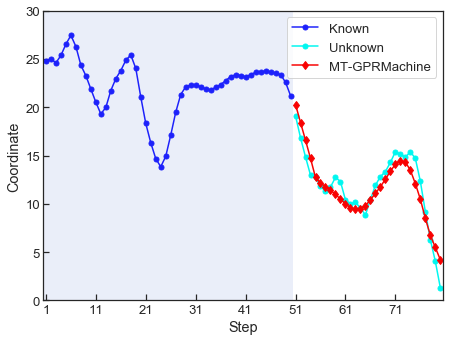

In [19]:
ax = gpm.plot.plot_prediction(known, truth, pred)
ax.set_ylim(0, 30)
ax.set_xticks(range(0, 80, 10))
ax.set_xticklabels(np.arange(1, 80 + 1, 10))
ax.set_xlim(-.5, 80 - .5)
ax.set_xlabel('Step')
ax.set_ylabel('Coordinate')
ax.legend()
plt.tight_layout()